In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('US_graduate_schools_admission_parameters_dataset.csv')

In [15]:
print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
None


In [17]:
data.rename(columns={"Chance of Admit ": "admit"}, inplace=True)

In [18]:
data['admit'] = (data['admit'] >= 0.75).astype(int)

In [19]:
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA', 'Research']
X = data[feature_cols]
y = data['admit']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [22]:
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_mat)
print("Accuracy Score:", metrics.accuracy_score(Y_test, Y_pred))
print("Accuracy in %:", round(metrics.accuracy_score(Y_test, Y_pred) * 100), "%")

Confusion Matrix:
 [[34  8]
 [ 8 30]]
Accuracy Score: 0.8
Accuracy in %: 80 %


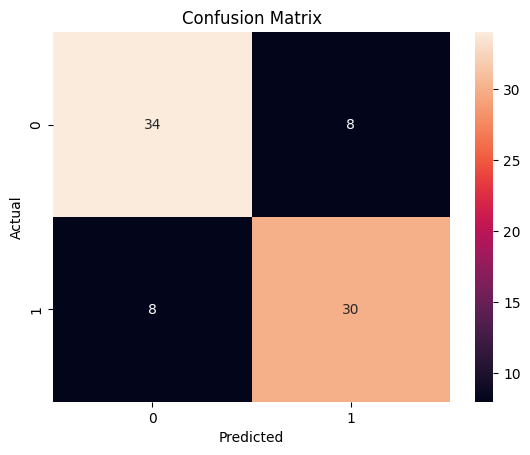

In [23]:
conf_df = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_df, annot=True)
plt.title("Confusion Matrix")
plt.show()